In [24]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from sklearn import gaussian_process as gp

DE_PRED = 'min_delta_E_Pred'
DE_TRUE = 'minimal_delta_E_True'
Z = 'Z'
TRUE_N = 'True_N'
PRED_N = 'Pred_N'
ERROR = 'error'
df = pd.read_csv(r'C:\Users\dor00\PycharmProjects\Weight-Shape-Decomposition\data_processed\test1_1toinf')



In [21]:
df

,Unnamed: 0,id,Z,True_N,Pred_N,minimal_delta_E_True,min_delta_E_Pred,sum_3d
0,0,05_818,10,48,28,0.000926,0.045779,3.173001
1,1,05_819,10,22,25,0.002306,0.023761,0.935793
2,2,05_347,10,1,3,0.000000,0.161087,0.047746
3,3,05_342,10,1,3,0.000000,0.279175,0.079399
4,4,05_343,10,2,4,1.537959,0.050911,0.099939
...,...,...,...,...,...,...,...,...
907,907,08_533,10,1,1,0.000000,0.000000,0.041057
908,908,08_411,10,1,3,0.000000,0.145874,0.068929
909,909,08_923,10,2,4,1.372027,0.318598,0.146888
910,910,08_805,10,1,2,0.000000,1.248131,0.072879


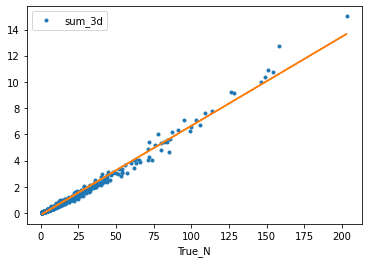

In [27]:
def linear(x, a, b):
    return a * x + b

x_name = TRUE_N
y_name = 'sum_3d'
popt, pcov = curve_fit(linear, df[x_name], df[y_name])
y_pred = linear(df[x_name], *popt)

ax = df.plot(y='sum_3d', x=TRUE_N, style='.')
ax.plot(df[x_name], y_pred)

In [35]:
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
x, y = df[x_name].to_numpy(), df[y_name].to_numpy()
model.fit(x[:, np.newaxis], y[:, np.newaxis])
params = model.kernel_.get_params()
y_pred, std = model.predict(x[:, np.newaxis], return_std=True)
plt.plot(df[x_name], std[0, :])
# test = df[x_name][:, np.newaxis]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
df.plot(x=DE_TRUE, y=ERROR, style='.', color=(1, 0, 0, 0.1))
plt.show()